# MRC 대회 Dataset EDA

## 0. 개요

* __실험 제목__ : 대회 데이터셋 EDA
* __작성자__ : 김준석_T3055
* __실험 일시__ : 22.05.04 ~ 22.05.04(1일간)

* __실험 목적__ : 데이터셋을 분석하여 데이터셋의 오류점이나 보완할 점을 찾는다. 데이터셋의 특징이나 경향성을 파악한다.
* __관련 근거__ : 없음
* __실험 WorkFlow__ : 데이터셋 오류 및 이상치 탐지 -> 데이터 시각화등을 통한 데이터셋의 특징확인
* __기타__ : Jupyter Notebook 사용하여 실험

## 1. Dataset 불러오기

In [103]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
from datasets import load_from_disk
import json
from tqdm.notebook import tqdm

#arrow 파일
dataset = load_from_disk("/opt/ml/input/data/train_dataset")
test_dataset = load_from_disk("/opt/ml/input/data/test_dataset")

#DatasetDict에서 가져오기
train_dataset = dataset["train"]
valid_dataset = dataset["validation"]
test_dataset = test_dataset['validation']

# DataFrame
train_df = pd.DataFrame(train_dataset)
valid_df = pd.DataFrame(valid_dataset)
test_df = pd.DataFrame(test_dataset)

# Retrieval
wiki_corpus = pd.read_json("/opt/ml/input/data/wikipedia_documents.json").transpose()
wiki_corpus['text_length'] = int()
for i in tqdm(range(len(wiki_corpus))) : 
    wiki_corpus['text_length'][i] = len(wiki_corpus['text'][i])

/tmp/ipykernel_2574/935361674.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wiki_corpus['text_length'][i] = len(wiki_corpus['text'][i])


### 1-1. 데이터셋 확인
* Train Dataset(3952개) & Vaildation Dataset(240개)은 'title(주제)', 'context(문장)', 'question(질문)', 'id', 'answer(답의 위치, 답)', 'document_id', '\_\_index_level_0\_\_' 으로 구성됨.
* Test Dataset(600개)은 'question(질문)', 'id' 으로 구성됨.
* wiki_corpus(60613)는 'text(문장)', 'corpus_source(출처)', 'url', 'domain', 'title(주제)', 'author', 'html', 'document_id', 'text_length' 으로 구성됨.

In [108]:
train_df

,title,context,question,id,answers,document_id,__index_level_0__
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548
...,...,...,...,...,...,...,...
3947,이오 (위성),이오의 산\n이오의 산 목록\n 이오에는 100~150개의 산이 있다. 이들 산의 ...,대부분의 이오의 산이 형성되는데 영향을 끼친 것은?,mrc-0-005285,"{'answer_start': [317], 'text': ['지질 구조']}",8275,3445
3948,내니 다이어리,애니의 고군분투 뉴욕 입성기!!\n\n인류학자가 꿈인 21살 소녀 '애니(스칼렛 요...,애니는 어디서 태어났는가?,mrc-1-000699,"{'answer_start': [616], 'text': ['뉴저지']}",37764,450
3949,빈 필하모니 관현악단,1842년에 작곡가이자 지휘자인 오토 니콜라이가 빈 궁정 오페라극장 소속 관현악단을...,1854년에 니콜라이의 뒤를 이어 상임 지휘자로서 활동한 인물은?,mrc-0-003429,"{'answer_start': [255], 'text': ['칼 에케르트']}",12730,2252
3950,드래곤,원어는 고대 그리스어까지 거슬러 올라간다. 영어 문헌에 이 말이 나타나기 시작한 것...,드래곤의 암수 구분이 있는 신화는?,mrc-0-003956,"{'answer_start': [476], 'text': ['슬라브 신화']}",10924,2595


In [109]:
valid_df

,title,context,question,id,answers,document_id,__index_level_0__
0,전효숙,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,mrc-0-003264,"{'answer_start': [284], 'text': ['한보철강']}",9027,2146
1,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,mrc-0-004762,"{'answer_start': [146], 'text': ['1871년']}",51765,3106
2,촐라,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,mrc-1-001810,"{'answer_start': [517], 'text': ['나뭇잎']}",15694,1180
3,백조 기사,프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용...,로타이르가 백조를 구하기 위해 사용한 것은?,mrc-1-000219,"{'answer_start': [1109], 'text': ['금대야']}",59536,141
4,탈관료제화,탈관료제화는 현대사회에서 관료제 성격이 약화되는 현상이다. 현대사회에서 관료제는 약...,의견을 자유롭게 나누는 것은 조직 내 어떤 관계에서 가능한가?,mrc-1-000285,"{'answer_start': [386], 'text': ['수평적 관계']}",32991,184
...,...,...,...,...,...,...,...
235,전단 (제나라),"연나라 군대의 사령관이 악의에서 기겁으로 교체되자, 전단은 스스로 신령의 계시를 받...",전단이 연나라와의 전쟁에서 승리했을 당시 제나라의 왕은 누구인가?,mrc-0-000484,"{'answer_start': [1084], 'text': ['제 양왕']}",53265,329
236,티칼,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...,공놀이 경기장 중 일부는 어디에 위치하고 있나?,mrc-0-002095,"{'answer_start': [343], 'text': [''일곱 개의 신전 광장...",12190,1378
237,윤치호,1940년 5월 1일 오전 창씨개명에 비협조적이라는 이유로 조선총독부 경무국에서 소...,창씨개명령의 시행일을 미루는 것을 수락한 인물은?,mrc-0-003083,"{'answer_start': [247], 'text': ['미나미 지로']}",5326,2031
238,신잉카국,빌카밤바 지역은 파차쿠티 황제 때 부터 잉카 제국에 속해있던 지역이었다. 스페인 군...,망코 잉카가 쿠스코를 되찾기 위해 마련한 군사는 총 몇 명인가?,mrc-0-002978,"{'answer_start': [563], 'text': ['200,000명']}",48575,1963


In [110]:
test_df

,question,id
0,유령'은 어느 행성에서 지구로 왔는가?,mrc-1-000653
1,용병회사의 경기가 좋아진 것은 무엇이 끝난 이후부터인가?,mrc-1-001113
2,돌푸스에게 불특정 기간동안 하원이 잠시 쉬는 것을 건의 받았던 인물은?,mrc-0-002191
3,"마오리언어와 영어, 뉴질랜드 수화를 공식 언어로 사용하는 나라는?",mrc-0-003951
4,디엔비엔푸 전투에서 보응우옌잡이 상대한 국가는?,mrc-1-001272
...,...,...
595,타입 2 가이아 메모리을 만든 집단은?,mrc-0-002989
596,장면이 정치보복에 반대하는 입장에서 처벌을 원치 않은 대상은?,mrc-0-001804
597,"콜드게임 중 어떠한 계기로 인해 잠시 중단된 뒤, 익일에 게임이 진행되는 것은?",mrc-0-003411
598,제2캐나다기갑여단이 상륙한 곳은?,mrc-0-003436


In [111]:
wiki_corpus

,text,corpus_source,url,domain,title,author,html,document_id,text_length
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,None,나라 목록,None,None,0,454
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,None,나라 목록,None,None,1,2276
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,None,백남준,None,None,2,5068
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,None,아오조라 문고,None,None,3,601
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,None,아오조라 문고,None,None,4,465
...,...,...,...,...,...,...,...,...,...
60608,"오키나와 현립 박물관·미술관( , Okinawa Prefectural Museum ...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60608,612
60609,"1936년 7월, 오키나와현 교육위원회 부설 향토 박물관(沖縄県教育会附設郷土博物館)...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60609,839
60610,박물관은 개관 10주년이되는 2017년에 관의 애칭 및 마스코트를 일반인에게 공모했...,위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60610,307
60611,단결권 및 단체교섭권 협약(Right to Organise and Collectiv...,위키피디아,None,None,단결권 및 단체교섭권 협약,None,None,60611,302


### 1-2. 데이터셋 형태 변경
* 'answers' column의 형태를 변경하여 Dataframe에 좀 더 쉽게 접근할 수 있도록 한다.

In [132]:
df_list = [train_df, valid_df]

# ex) {'answer_start': [284], 'text': ['한보철강']}	
start = len("{'answer_start': [")
split_text = "], 'text': ["
end = len("]}")
flag = 0
for df in df_list : 
    flag += 1
    answer_start = []
    answer = []
    
    context_length = []
    question_length = []
    answer_length = []
    
    for idx, ans in enumerate(df['answers']) : 
        temp = str(ans)[start: -end].split(split_text)
        answer_start.append(int(temp[0]))
        answer.append(temp[1][1:-1])
        
    for i in range(len(df)) : 
        temp_context_length = len(df['context'][i])
        temp_question_length = len(df['question'][i])
        temp_answer_length = len(answer[i])
        
        context_length.append(temp_context_length)
        question_length.append(temp_question_length)
        answer_length.append(temp_answer_length)
        
    temp_df = pd.DataFrame({'title': df['title'], 
                                    'context' : df['context'], 
                                    'context_length' : context_length,
                                    'question': df['question'], 
                                    'question_length' : question_length,
                                    'answer': answer,
                                    'answer_start': answer_start, 
                                    'answer_length' : answer_length,
                                    'document_id': df['document_id'], 
                                    '__index_level_0__': df['__index_level_0__'],})
    
    if flag == 1 : 
        preprocessed_train_df  = temp_df
    elif flag == 2 :
        preprocessed_valid_df = temp_df

In [133]:
preprocessed_train_df

,title,context,context_length,question,question_length,answer,answer_start,answer_length,document_id,__index_level_0__
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,862,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,32,하원,235,2,18293,42
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,621,현대적 인사조직관리의 시발점이 된 책은?,22,《경영의 실제》,212,8,51638,2873
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,850,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,30,백성,510,2,5028,230
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",727,11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,39,중국,625,2,34146,992
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,609,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,26,4개,30,2,47334,548
...,...,...,...,...,...,...,...,...,...,...
3947,이오 (위성),이오의 산\n이오의 산 목록\n 이오에는 100~150개의 산이 있다. 이들 산의 ...,1297,대부분의 이오의 산이 형성되는데 영향을 끼친 것은?,28,지질 구조,317,5,8275,3445
3948,내니 다이어리,애니의 고군분투 뉴욕 입성기!!\n\n인류학자가 꿈인 21살 소녀 '애니(스칼렛 요...,643,애니는 어디서 태어났는가?,14,뉴저지,616,3,37764,450
3949,빈 필하모니 관현악단,1842년에 작곡가이자 지휘자인 오토 니콜라이가 빈 궁정 오페라극장 소속 관현악단을...,1533,1854년에 니콜라이의 뒤를 이어 상임 지휘자로서 활동한 인물은?,36,칼 에케르트,255,6,12730,2252
3950,드래곤,원어는 고대 그리스어까지 거슬러 올라간다. 영어 문헌에 이 말이 나타나기 시작한 것...,1110,드래곤의 암수 구분이 있는 신화는?,19,슬라브 신화,476,6,10924,2595


In [134]:
preprocessed_valid_df

,title,context,context_length,question,question_length,answer,answer_start,answer_length,document_id,__index_level_0__
0,전효숙,"순천여자고등학교 졸업, 1973년 이화여자대학교를 졸업하고 1975년 제17회 사법...",625,처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,30,한보철강,284,4,9027,2146
1,스토우빌선,요크 카운티 동쪽에 처음으로 여객 열차 운행이 시작한 시점은 1868년 토론토 & ...,964,스카버러 남쪽과 코보콘그 마을의 철도 노선이 처음 연장된 연도는?,36,1871년,146,5,51765,3106
2,촐라,"촐라 정부\n 촐라의 정부 체제는 전제군주제였으며,2001 촐라의 군주는 절대적인 ...",611,촌락에서 운영 위원 후보자 이름을 쓰기위해 사용된 것은?,31,나뭇잎,517,3,15694,1180
3,백조 기사,프랑스의 십자군 무훈시는 1099년 예루살렘 왕국의 통치자가 된 고드프루아 드 부용...,1391,로타이르가 백조를 구하기 위해 사용한 것은?,24,금대야,1109,3,59536,141
4,탈관료제화,탈관료제화는 현대사회에서 관료제 성격이 약화되는 현상이다. 현대사회에서 관료제는 약...,608,의견을 자유롭게 나누는 것은 조직 내 어떤 관계에서 가능한가?,34,수평적 관계,386,6,32991,184
...,...,...,...,...,...,...,...,...,...,...
235,전단 (제나라),"연나라 군대의 사령관이 악의에서 기겁으로 교체되자, 전단은 스스로 신령의 계시를 받...",1254,전단이 연나라와의 전쟁에서 승리했을 당시 제나라의 왕은 누구인가?,36,제 양왕,1084,4,53265,329
236,티칼,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...,897,공놀이 경기장 중 일부는 어디에 위치하고 있나?,26,'일곱 개의 신전 광장',343,13,12190,1378
237,윤치호,1940년 5월 1일 오전 창씨개명에 비협조적이라는 이유로 조선총독부 경무국에서 소...,1314,창씨개명령의 시행일을 미루는 것을 수락한 인물은?,27,미나미 지로,247,6,5326,2031
238,신잉카국,빌카밤바 지역은 파차쿠티 황제 때 부터 잉카 제국에 속해있던 지역이었다. 스페인 군...,998,망코 잉카가 쿠스코를 되찾기 위해 마련한 군사는 총 몇 명인가?,35,"200,000명",563,8,48575,1963


## 2. Dataset의 기본 정보 살펴보기

### 2-1. Train Dataset 기본 정보

1. '윤치호'라는 주제의 문장이 43개나 발견되었다.
2. 최대로 중복된 문장은 4번 중복된 문장이다.
3. 어떠한 질문도 중복되지 않았다.
4. 질문의 평균 길이는 약 29 이다.(최소 8 ~ 최대 78)
5. '프랑스'가 정답인 질문은 15개나 존재한다.
6. 정답의 평균 길이는 약 6 이다.(최소 1 ~ 최대 83)
5. 3952개 문장 중 0번 위치(시작부터 답이존재)인 문장은 69개(1.7%)이다.

In [135]:
preprocessed_train_df.describe(include='all')

,title,context,context_length,question,question_length,answer,answer_start,answer_length,document_id,__index_level_0__
count,3952,3952,3952.000000,3952,3952.000000,3952,3952.000000,3952.000000,3952.000000,3952.000000
unique,2716,3340,NaN,3952,NaN,3622,NaN,NaN,NaN,NaN
top,윤치호,"그러나 한편으로는 미국 사회의 인종차별주의적, 흑인을 차별하는 태도를 목격하면서 백...",NaN,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,NaN,프랑스,NaN,NaN,NaN,NaN
freq,43,4,NaN,1,NaN,15,NaN,NaN,NaN,NaN
mean,NaN,NaN,920.220648,NaN,29.322368,NaN,376.794028,6.276569,28399.783401,1496.027328
std,NaN,NaN,356.500514,NaN,8.727421,NaN,309.122555,5.355561,17475.051830,1060.480948
min,NaN,NaN,512.000000,NaN,8.000000,NaN,0.000000,1.000000,4572.000000,0.000000
25%,NaN,NaN,645.000000,NaN,23.000000,NaN,138.000000,3.000000,11615.750000,587.000000
50%,NaN,NaN,819.000000,NaN,29.000000,NaN,310.000000,5.000000,26295.000000,1189.500000
75%,NaN,NaN,1099.250000,NaN,35.000000,NaN,538.000000,8.000000,44240.250000,2416.250000


### 2-2. Validation Dataset 기본 정보

1. '교황 비오 11세'라는 주제의 문장이 2개 발견되었다.
2. 최대로 중복된 문장은 2번 중복된 문장이다.
3. 어떠한 질문도 중복되지 않았다.
4. 질문의 평균 길이는 약 29 이다.(최소 9 ~ 최대 59)
5. 어떠한 정답도 중복되지 않았다.
6. 정답의 평균 길이는 약 7 이다.(최소 1 ~ 최대 64)
7. 240개 문장 중 0번 위치(시작부터 답이존재)인 문장은 5개(2.1%)이다.

In [136]:
preprocessed_valid_df.describe(include='all')

,title,context,context_length,question,question_length,answer,answer_start,answer_length,document_id,__index_level_0__
count,240,240,240.000000,240,240.000000,240,240.000000,240.000000,240.000000,240.000000
unique,228,235,NaN,240,NaN,240,NaN,NaN,NaN,NaN
top,교황 비오 11세,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...,NaN,처음으로 부실 경영인에 대한 보상 선고를 받은 회사는?,NaN,한보철강,NaN,NaN,NaN,NaN
freq,2,2,NaN,1,NaN,1,NaN,NaN,NaN,NaN
mean,NaN,NaN,916.725000,NaN,29.195833,NaN,391.516667,6.912500,29027.704167,1572.008333
std,NaN,NaN,360.032122,NaN,8.728301,NaN,311.943965,6.858755,17915.733034,1049.535956
min,NaN,NaN,517.000000,NaN,9.000000,NaN,0.000000,1.000000,4866.000000,16.000000
25%,NaN,NaN,616.750000,NaN,23.000000,NaN,154.000000,3.000000,11726.250000,671.250000
50%,NaN,NaN,820.500000,NaN,29.000000,NaN,317.000000,5.000000,27485.000000,1372.000000
75%,NaN,NaN,1107.250000,NaN,35.000000,NaN,536.000000,8.000000,44860.250000,2470.250000


## 3. Dataset의 분포 알아보기

### 3-1. title length 분포

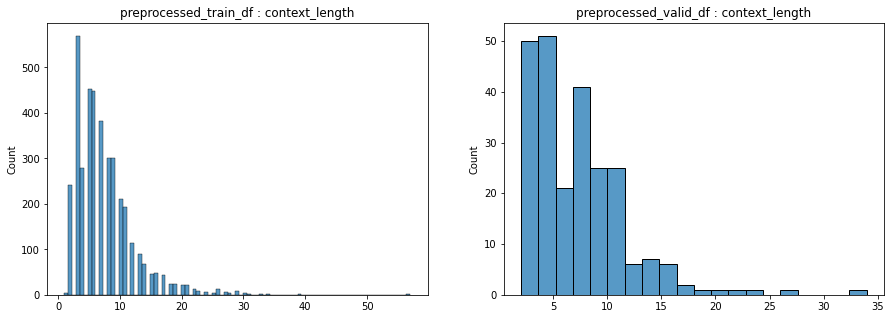

In [137]:
# title length
train_title_length = [len(e) for e in preprocessed_train_df['title']]
vaild_title_length = [len(e) for e in preprocessed_valid_df['title']]
fix, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(train_title_length, ax=ax[0]).set_title("preprocessed_train_df : context_length")
sns.histplot(vaild_title_length, ax=ax[1]).set_title("preprocessed_valid_df : context_length");

### 3-2. context length 분포

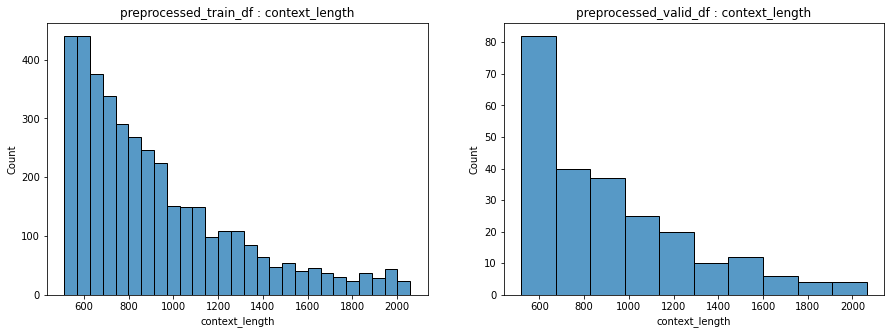

In [138]:
# context length
fix, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(preprocessed_train_df['context_length'], ax=ax[0]).set_title("preprocessed_train_df : context_length")
sns.histplot(preprocessed_valid_df['context_length'], ax=ax[1]).set_title("preprocessed_valid_df : context_length");

### 3-3. question length 분포

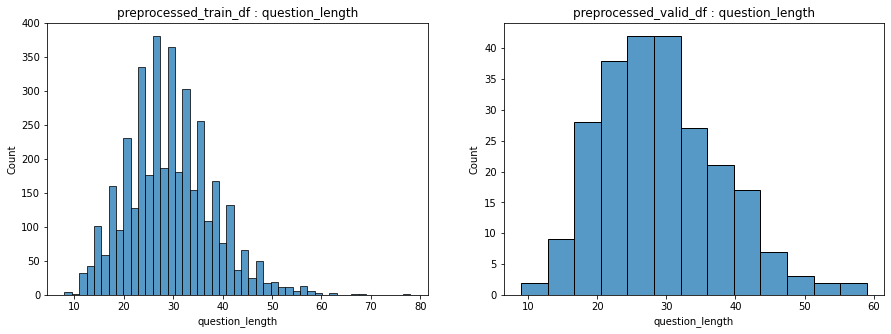

In [139]:
# question length
fix, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(preprocessed_train_df['question_length'], ax=ax[0]).set_title("preprocessed_train_df : question_length")
sns.histplot(preprocessed_valid_df['question_length'], ax=ax[1]).set_title("preprocessed_valid_df : question_length");

### 3-4. answer length 분포

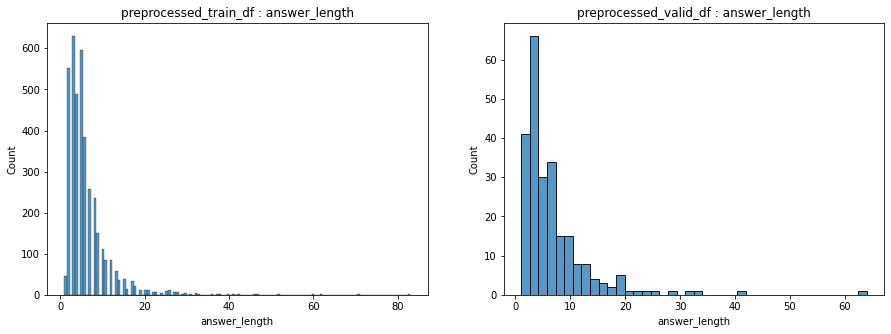

In [140]:
# answer length
fix, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(preprocessed_train_df['answer_length'], ax=ax[0]).set_title("preprocessed_train_df : answer_length")
sns.histplot(preprocessed_valid_df['answer_length'], ax=ax[1]).set_title("preprocessed_valid_df : answer_length");

### 3-5. answer length 분포

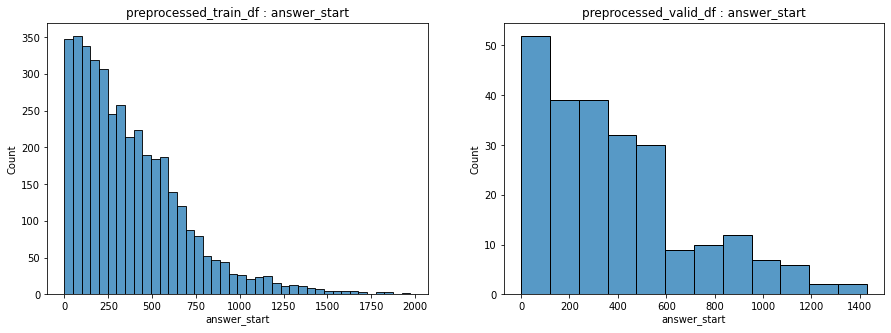

In [141]:
# answer start
fix, ax = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(preprocessed_train_df['answer_start'], ax=ax[0]).set_title("preprocessed_train_df : answer_start")
sns.histplot(preprocessed_valid_df['answer_start'], ax=ax[1]).set_title("preprocessed_valid_df : answer_start");

## 4. 잘못된 데이터 찾기

### 4-1. question에서 물음표가 없는 것?

In [146]:
for i in range(len(preprocessed_train_df)) : 
    if preprocessed_train_df['question'][i][-1] != '?' :
        print(f"{i}번째 질문 : {preprocessed_train_df['question'][i]}")

295번째 질문 : 피아니스트이자 출판업을 하는 베토벤의 친구는
3170번째 질문 : 이고르 댜틀로프가 이끄는 모임에서 가장 먼저 빠진 사람은?-


In [158]:
# 없음
for i in range(len(preprocessed_valid_df)) : 
    if preprocessed_valid_df['question'][i][-1] != '?' :
        print(f"{i}번째 질문 : {preprocessed_valid_df['question'][i]}")

### 4-2. answer이 context 내부에 없는 것?

In [153]:
for i in range(len(preprocessed_train_df)) : 
    if preprocessed_train_df['answer'][i] not in preprocessed_train_df['context'][i] :
        print(f"{i}번째 문장 : 답 = {preprocessed_train_df['answer'][i]} | 문장 = {preprocessed_train_df['context'][i]}")

# 최근의 반도의 경제사범 \xad국민의 신경제 윤리의 파악을 위하여\xad
# 최근의 반도의 경제사범 ­국민의 신경제 윤리의 파악을 위하여­
        
# 답에 이상한 것들이 포함되어 있는 경우를 지워주어야 하는가?
# ex) \xad \n

544번째 문장 : 답 = 최근의 반도의 경제사범 \xad국민의 신경제 윤리의 파악을 위하여\xad | 문장 = 경상북도 출신으로 1935년에 경성제국대학 법문학부 법학과를 졸업했다. 1938년에 경성지방법원 및 경성지방법원검사국 사법관시보가 된 것을 시작으로 법조계에서 근무를 시작했다.\n\n1939년에는 경성지방법원 검사대리가 되었고, 1940년에 예비검사를 거쳐 그해부터 1943년까지 조선총독부 검사로 근무했다. 강중인은 경제담당 검사로 일하면서 태평양 전쟁 중 시국 연설과 기고로 사회 활동을 병행했다. \n\n1942년에 조선임전보국단 주최로 경성중앙방송국에서 저명 인사의 시국연설을 방송했을 때, 〈필승사상전(必勝思想戰)〉이라는 제목으로 연설한 일이 있다.\n\n《삼천리》에 〈최근의 반도의 경제사범 ­국민의 신경제 윤리의 파악을 위하여­〉라는 글을 기고하기도 했다. 이 글에서는 경제사범을 "미증유의 국난"을 돌파해 "대동아를 건설하는" 국가적으로 중대한 순간에 사리사욕에만 눈이 먼 집단으로 묘사하고, 이들은 국민의 일대수치이므로 엄벌주의로 대처할 것이라 경고했다. 또한 관민이 일체가 되어 "일사보국의 성을 다함"으로써 성업을 어서 완수해야 한다는 주장을 폈다.\n\n1943년에 대전지방법원 검사로 자리를 옮겨 일본 제국이 태평양 전쟁에서 패망할 때까지 근무했다. \n\n미군정 하의 서울에서 변호사를 개업하면서 좌익 운동에 뛰어들었다. 좌익 법조인 모임인 법학자동맹과 남조선로동당에 가입해 활동했다. 강중인이 남로당에 가입하게 된 동기는 후에 법정에서 다음과 같이 밝힌 바 있다. \n\n일정(日政) 당시에는 내가 내 한 몸을 구하기에 여력이 없었습니다. 8·15 해방을 맞이하자 피고는 이때야 깨달은 바가 있었습니다. 이는 다름이 아닙니다. 내가 어찌하면 국가와 민족을 위하여 일할 수 있을까 함이었습니다. 해외에서 국가와 민족을 위하여 투쟁하던 위대한 애국자들이 해방된 조국을 찾아 들어옴을 볼 때 무어라고 표현할 수 없는 느낌이 있었습니다. 그 후 피고는 남

In [159]:
# 없음
for i in range(len(preprocessed_valid_df)) : 
    if preprocessed_valid_df['answer'][i] not in preprocessed_valid_df['context'][i] :
        print(f"{i}번째 문장 : 답 = {preprocessed_valid_df['answer'][i]} | 문장 = {preprocessed_valid_df['context'][i]}")

### 4-3. answer start의 위치가 올바르지 않은 것?

In [157]:
# 없음
for i in range(len(preprocessed_train_df)) : 
    if preprocessed_train_df['answer'][i][0] != preprocessed_train_df['context'][i][preprocessed_train_df['answer_start'][i]] :
        print(f"{i}번째 문장 : answer = {preprocessed_train_df['answer'][i]} | 틀린 위치 = {preprocessed_train_df['answer_start'][i]} | 진짜 위치 = {preprocessed_train_df['context'][i].find(preprocessed_train_df['answer'][i])} | 문장 = {preprocessed_train_df['context'][i]}")

In [160]:
for i in range(len(preprocessed_valid_df)) : 
    if preprocessed_valid_df['answer'][i][0] != preprocessed_valid_df['context'][i][preprocessed_valid_df['answer_start'][i]] :
        print(f"{i}번째 문장 : answer = {preprocessed_valid_df['answer'][i]} | 틀린 위치 = {preprocessed_valid_df['answer_start'][i]} | 진짜 위치 = {preprocessed_valid_df['context'][i].find(preprocessed_valid_df['answer'][i])} | 문장 = {preprocessed_valid_df['context'][i]}")

## 5. 단순 중복 데이터 찾기

### 5-1. title 중복

In [174]:
preprocessed_train_df[preprocessed_train_df.duplicated(['title'],keep=False)].sort_values('title')

,title,context,context_length,question,question_length,answer,answer_start,answer_length,document_id,__index_level_0__
978,1875년 페이지 법,미국으로 온 최초의 중국인 이민자들은 압도적으로 남성이 다수였다. 그들 대다수가 캘...,1033,미국으로 이민 온 사람들은 누구로부터 돈을 차용할 수 있었나?,34,중개인,271,3,40872,1719
2604,1875년 페이지 법,미국으로 온 최초의 중국인 이민자들은 압도적으로 남성이 다수였다. 그들 대다수가 캘...,1033,남성 노동자들은 누가 중국 남성들의 미국 이민을 거부하길 바랐는가?,37,의회 의원,790,5,40872,2950
2865,1952년 이집트 혁명,한편 수에즈 운하에 주둔하고 있던 영국군은 해당 지역의 반영 봉기를 진압할 준비를 ...,874,봉기군과 함께 영국군의 협상가를 살인한 경찰의 소속 지역은?,33,페다인,127,3,39988,557
2352,1952년 이집트 혁명,1882년 영국군은 앵글로-이집트 전쟁을 통하여 이집트 정치에 개입하기 시작하였다....,1327,1949년에 결성된 비밀조직의 표면상 리더는 누구인가?,30,무하마드 나기브,1114,8,39987,2665
949,1952년 이집트 혁명,1953년 6월 나기브는 공화정을 선포하여 군주제와 귀족 제도를 폐지하였고 이집트 ...,616,나기브에게 가택연금 처분을 내린 자는?,21,나세르,388,3,39989,1794
...,...,...,...,...,...,...,...,...,...,...
2730,히지카타 도시조,"10월 20일, 에조치 와시노키에 상륙 후 도시조는 문도군 총독이 되어서 고료카쿠(...",1979,후타마타구치 전투가 일어났던 달은?,19,4,847,1,11835,215
626,히페리온 (위성),"보이저 2호는 토성을 지나가면서 많은 사진들을 전송했지만, 히페리온과는 멀리 떨어진...",683,2005년까지 히페리온에 가장 근접해 사진을 찍은 탐사선은 무엇인가?,38,카시니 호,152,5,14646,143
2243,히페리온 (위성),"보이저 2호는 토성을 지나가면서 많은 사진들을 전송했지만, 히페리온과는 멀리 떨어진...",683,토성과 히페리온의 사진을 촬영한 우주선의 이름은 무엇인가?,32,보이저 2호,0,6,14646,1105
1449,힐,"힐은 전쟁중에 논쟁을 피하지 못했다. 병약한 체질이라서 여러 번 병치레를 했기에, ...",1082,힐이 사관학교 병원에서 임질의 치료를 받은 때는 몇 월이었나요?,35,9월,216,2,9473,661


In [173]:
preprocessed_valid_df[preprocessed_valid_df.duplicated(['title'],keep=False)].sort_values('title')

,title,context,context_length,question,question_length,answer,answer_start,answer_length,document_id,__index_level_0__
61,교황 비오 11세,오랫동안 학문에 몸 담아왔던 그는 교회 내에서 급속도로 출세가도를 달리기 시작했다....,922,아킬레 라티가 추기경으로 추대된 해는?,21,1932년,47,5,6778,297
66,교황 비오 11세,"비오 11세는 이리 오랫동안 질병을 앓았으며, 1938년 11월 25일 몇 시간에 ...",1208,교황 비오 11세가 사망한 연도는?,19,1939년,1114,5,6784,1817
56,김준연,1947년 12월 김성수가 한민당 당수가 되면서 그는 한민당 부당수로 선임되었다. ...,544,김준연은 김구가 누구와 몰래 교류하고 있다고 주장했나요?,31,공산당,255,3,7437,620
132,김준연,6세 때부터 월출산을 보며 서당에 나가 한문을 배웠다 마을 서당에서 공부하다가 형편...,1429,김준연은 김옥성과 몇 년간 함께 살았나요?,23,60년간,248,4,7431,2630
118,나치 독일,1941년 6월 22일에는 독일이 독소불가침 조약을 깨고 380만 명의 추축국 군대...,1298,러시아에 있는 다량의 천연자원을 약탈하려했던 계획은?,29,바르바로사 작전,67,8,7907,2752
145,나치 독일,1919년부터 1933년까지 독일은 제 1차 세계대전 이후 세워진 바이마르 공화국이...,1262,바이마르 정부가 화폐를 수없이 찍어낸 이유는?,25,배상금을 주기 위하여,279,11,7896,2521
20,데카메론의 줄거리,"이야기에서 성 프란체스코 수도회의 수도사 라고만 언급되나, 조반니 빌라니의 연대기와...",707,데메카론에는 무엇을 풍자하는 이야기가 들어있나요?,27,뇌물,689,2,25366,3453
190,데카메론의 줄거리,안드레우치오 디 피에트로는 하룻밤 사이에 온갖 우여곡절을 겪은 사람이다. 안드레우치...,1532,여자가 안드레우치오의 디 피에트로에 대한 정보를 얻었던 인물은?,35,할머니,209,3,25375,2111
239,레닌주의,사회주의 혁명은 오로지 선진노동자계급에 기초한 계급투쟁으로서 이루어질 수 있다고 주...,967,마르크스주의자들의 사상은?,14,공산주의,811,4,5761,399
32,레닌주의,"레닌주의에서 협동조합 개념을 이해할 때 주의해야 할 것은, 레닌이 주장하는 것은 자...",1149,레닌이 출간한 책 중 농민의 자발적 참여에 대한 내용이 포함되어있는 것은?,41,『협동조합에 관하여』,312,11,5779,1501


### 5-2. context 중복

In [175]:
preprocessed_train_df[preprocessed_train_df.duplicated(['context'],keep=False)].sort_values('context')

,title,context,context_length,question,question_length,answer,answer_start,answer_length,document_id,__index_level_0__
2181,시간이동,"""시간이동""은 미국의 방송사 ABC의 텔레비전 드라마 시리즈 로스트의 시즌 프리미어...",650,시간이동' 에피소드의 다음 에피소드의 제목은 무엇인가?,30,거짓말,234,3,25858,368
2164,시간이동,"""시간이동""은 미국의 방송사 ABC의 텔레비전 드라마 시리즈 로스트의 시즌 프리미어...",650,ABC에서 방영되는 '시간이동'의 장르는?,23,텔레비전 드라마,21,8,25858,3135
3408,히이라기자와 에리오르,'사쿠라 카드 편'에서부터 등장하는 인물로 종종 알 수 없는 웃음과 아이답지 않은 ...,870,사쿠라가 성장할 때 스피넬 선을 만든 이유는?,25,자신에게서 크로우 리드를 찾지 않게 하려고,356,23,49888,3487
1350,히이라기자와 에리오르,'사쿠라 카드 편'에서부터 등장하는 인물로 종종 알 수 없는 웃음과 아이답지 않은 ...,870,에리오르에게는 효력이 없는 마법은?,19,달 속성의 마법,120,8,49888,3511
2353,하인리히 4세,1090년 교황 우르바노 2세의 주선으로 43세의 토스카나 여후작 마틸다가 결혼을 ...,1214,마틸다와 결혼한 인물은?,13,벨프 5세,81,5,11195,1608
...,...,...,...,...,...,...,...,...,...,...
1946,탐무즈,활달한 대지의 여신 이슈타르-인니나(이하 이슈타르)가 식물과 생명의 성장의 신인 자...,612,무엇이 이슈타르가 사랑한 대상을 죽음에 이르게 했나?,29,멧돼지,249,3,13012,1559
2743,효문태후,"효문태후 박씨(孝文太后 薄氏, ? ~ 기원전 155년)는 전한 고제 유방의 후궁 중...",990,위표가 항우 쪽으로 돌아서는 계기가 된 발언을 한 인물은 누구인가?,37,허부,252,2,34137,204
2684,효문태후,"효문태후 박씨(孝文太后 薄氏, ? ~ 기원전 155년)는 전한 고제 유방의 후궁 중...",990,"본래, 한왕 측에서 팽성 대전에 참전했으나 한을 배신하고 항우의 편으로 넘어간 인물은?",48,위표,278,2,34137,1768
1449,힐,"힐은 전쟁중에 논쟁을 피하지 못했다. 병약한 체질이라서 여러 번 병치레를 했기에, ...",1082,힐이 사관학교 병원에서 임질의 치료를 받은 때는 몇 월이었나요?,35,9월,216,2,9473,661


In [176]:
preprocessed_valid_df[preprocessed_valid_df.duplicated(['context'],keep=False)].sort_values('context')

,title,context,context_length,question,question_length,answer,answer_start,answer_length,document_id,__index_level_0__
74,버트런드 러셀,러셀은 1890년 케임브리지 대학교의 트리니티 칼리지에 장학생으로 들어갔다. 그는 ...,667,러셀의 여자 친구의 종교는?,15,퀘이커 교,215,5,5265,2418
231,버트런드 러셀,러셀은 1890년 케임브리지 대학교의 트리니티 칼리지에 장학생으로 들어갔다. 그는 ...,667,러셀은 누구의 가족과 함께 1889년 파리 박람회에 갔는가?,33,퀘이커 교도였던 앨리스 페어살 스미스,215,20,5265,760
6,자수장,"수를 놓을 때에 사용하는 기법을 문양의 형태에 따라 나누어 보면 선을 잇는 수, 면...",597,징금수는 서양 자수의 어떤 기법과 같은 기술을 사용하는가?,32,코칭 스티치,192,6,19975,1366
81,자수장,"수를 놓을 때에 사용하는 기법을 문양의 형태에 따라 나누어 보면 선을 잇는 수, 면...",597,수를 놓을 때에 사용하는 기법 중 아주 작은 점으로 표현하는 방식은?,38,점수,101,2,19975,744
129,송나라,"요나라와의 전연의 맹세에 지불한 것으로 알려진 재물은 비단 20만필, 은 10만량이...",1567,송나라가 돈을 지불하여 피하고자 했던 것은?,24,전쟁,251,2,7305,2932
205,송나라,"요나라와의 전연의 맹세에 지불한 것으로 알려진 재물은 비단 20만필, 은 10만량이...",1567,송이 금에게 바친 공물은 은 30만량과 비단 몇 필인가?,31,10만필,163,4,7305,2257
162,태양권계면,태양권계면(Heliopause)은 천문학에서 태양의 태양풍을 성간매질이 멈추게 하는...,712,"입자들의 속도가 줄 때, 방출되는 에너지가 만들어내는 것은?",33,충격파,435,3,7635,2390
189,태양권계면,태양권계면(Heliopause)은 천문학에서 태양의 태양풍을 성간매질이 멈추게 하는...,712,태양풍을 멈추게 하는 것과 말단 충격의 틈을 무엇이라 부르는가?,35,헬리오시스,609,5,7635,458
73,티칼,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...,897,돌을 캐고 난 빈 채석장은 어떠한 용도로 이용하였나?,29,저수지,435,3,12190,3183
236,티칼,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...,897,공놀이 경기장 중 일부는 어디에 위치하고 있나?,26,'일곱 개의 신전 광장',343,13,12190,1378


### 5-3. question 중복

In [177]:
preprocessed_train_df[preprocessed_train_df.duplicated(['question'],keep=False)].sort_values('question')

,title,context,context_length,question,question_length,answer,answer_start,answer_length,document_id,__index_level_0__


In [178]:
preprocessed_valid_df[preprocessed_valid_df.duplicated(['question'],keep=False)].sort_values('question')

,title,context,context_length,question,question_length,answer,answer_start,answer_length,document_id,__index_level_0__


### 5-4. answer 중복

In [179]:
preprocessed_train_df[preprocessed_train_df.duplicated(['answer'],keep=False)].sort_values('answer')

,title,context,context_length,question,question_length,answer,answer_start,answer_length,document_id,__index_level_0__
534,팔라 제국,데바팔라 사후 팔라 제국은 점차 힘을 잃기 시작하였다. 데바팔라의 조카였던 비그라하...,647,라지야팔라의 통솔 기간은?,14,12년,209,3,35229,667
806,하워드 마셜,그는 구두로는 안나 니콜 스미스에게 자신의 재산의 반을 주겠다고 약속했다 하나 유언...,619,하워드 마셜의 재산 상속을 위해 안나 니콜 스미스가 법정 소송을 벌인 기간은?,43,12년,108,3,36640,1564
3831,교황 우르바노 5세,우르바노 5세 치세의 큰 특징으로는 로마로 귀환하려고 노력한 점과 로마에 대한 세속...,1521,우르바노 5세가 십자군동원을 명령한 연도는?,24,1362년,131,5,6773,784
3181,교황 우르바노 5세,우르바노 5세 치세의 큰 특징으로는 로마로 귀환하려고 노력한 점과 로마에 대한 세속...,1521,우르바노 5세가 이태리 전역에 십자군 원정을 명령한 해는?,32,1362년,131,5,6773,1142
2859,모르겐슈테른 (무기),모르겐슈테른(Morgenstern금성)은 중세 시대 무기의 하나이다. 영어명인 모닝...,1020,모닝스타를 사용하기 시작한 시기는?,19,14세기,488,4,9139,2459
...,...,...,...,...,...,...,...,...,...,...
110,빌 클린턴,클린턴의 첫 기간의 말기가 접근하면서 새로운 스캔들이 일어났다. 스캔들은 클린턴과 ...,624,클린턴의 두 번째 임기는 어떤 스캔들로 인해 내리막을 걷게 되었나?,37,화이트워터 사건,257,8,4633,2707
3219,크레시 전투,프랑스군이 퇴각하자 잉글랜드군은 부상자 중에서 몸값을 받을 만한 사람을 추려냈다. ...,564,에드워드 3세가 프랑스에서 철수한 것은 무엇 때문인가?,30,흑사병,453,3,9059,88
3891,팔레올로고스 왕조 치하의 비잔티움 제국,팔레올로고스 왕조 치하의 비잔티움 제국은 제4차 십자군 전쟁(1204년) 이후 건국...,970,튀르크인이 영토를 빼앗아갈 무렵 유행하던 전염병은?,28,흑사병,627,3,59729,63
1164,1980년 일본 프로 야구 올스타전,전년도에 구단 창단 이래 첫 일본 시리즈 우승을 이끈 히로시마 도요 카프의 고바 다...,619,1979년 일본시리즈 우승팀은?,17,히로시마 도요 카프,30,10,41406,2608


In [180]:
preprocessed_valid_df[preprocessed_valid_df.duplicated(['answer'],keep=False)].sort_values('answer')

,title,context,context_length,question,question_length,answer,answer_start,answer_length,document_id,__index_level_0__


## 6. 복합 중복 데이터 찾기

### 6-1. 모든 것이 중복인 것 -> 삭제 대상

In [181]:
preprocessed_train_df[preprocessed_train_df.duplicated(['title','context','context_length','question','question_length','answer','answer_start','answer_length','document_id','__index_level_0__'],keep=False)].sort_values('answer')

,title,context,context_length,question,question_length,answer,answer_start,answer_length,document_id,__index_level_0__


In [182]:
preprocessed_valid_df[preprocessed_valid_df.duplicated(['title','context','context_length','question','question_length','answer','answer_start','answer_length','document_id','__index_level_0__'],keep=False)].sort_values('answer')

,title,context,context_length,question,question_length,answer,answer_start,answer_length,document_id,__index_level_0__


### 6-2. 모두 중복이지만 답변이 다른 것 -> 다중 정답
- 없음 (질문 중복이 없으므로)

### 6-3. 모두 중복이지만 answer start가 다른 것 -> 정답의 위치가 여러 곳
- 없음(질문 중복이 없으므로)

### 6-4. 모두 중복이지만 context가 다른 것 -> 동일한 답을 구할 수 있는 문장
- 없음(질문 중복이 없으므로)

### 6-5. 질문만 다르고 문장과 답변이 같은 것 -> 질문의 의미가 동일한 것

In [189]:
preprocessed_train_df[preprocessed_train_df.duplicated(['title','context','context_length','answer','answer_start','answer_length'],keep=False)].sort_values('answer')

,title,context,context_length,question,question_length,answer,answer_start,answer_length,document_id,__index_level_0__
3831,교황 우르바노 5세,우르바노 5세 치세의 큰 특징으로는 로마로 귀환하려고 노력한 점과 로마에 대한 세속...,1521,우르바노 5세가 십자군동원을 명령한 연도는?,24,1362년,131,5,6773,784
3181,교황 우르바노 5세,우르바노 5세 치세의 큰 특징으로는 로마로 귀환하려고 노력한 점과 로마에 대한 세속...,1521,우르바노 5세가 이태리 전역에 십자군 원정을 명령한 해는?,32,1362년,131,5,6773,1142
1862,베트남의 역사,베트남 전쟁\n\n 베트남 전쟁은 1964년 통킹만 사건을 구실로 미국이 북 베트남...,763,제2차 인도차이나 전쟁이 끝났던 해는?,21,1975년,131,5,8190,3048
2805,베트남의 역사,베트남 전쟁\n\n 베트남 전쟁은 1964년 통킹만 사건을 구실로 미국이 북 베트남...,763,베트남 내전이면서 국제전의 모습이었던 전쟁은 언제 끝났는가?,33,1975년,131,5,8190,2979
3205,2015년 네팔 봉쇄 사태,2015년 9월 20일에는 계속 정체중이였던 네팔의 헌법 수립안이 네팔 의회에서 9...,526,네팔의 헌법 수립안 투표에서 기권한 사람의 수는?,27,66명,82,3,47169,1805
2001,2015년 네팔 봉쇄 사태,2015년 9월 20일에는 계속 정체중이였던 네팔의 헌법 수립안이 네팔 의회에서 9...,526,네팔 의회 의원 중에서 투표를 포기하고 데모를 시작했던 인원은?,35,66명,82,3,47169,565
2756,조혜련,"조혜련은 일본 버라이어티 프로그램에 출연해서 한국을 비하하는 듯한 제반 발언과, 쇼...",573,"조혜련은 <힐링캠프, 기쁘지 아니한가> 이전에 어떤 프로그램에 출연하여 일본 활동에...",56,《황금어장 무릎팍도사》,120,12,10686,597
2702,조혜련,"조혜련은 일본 버라이어티 프로그램에 출연해서 한국을 비하하는 듯한 제반 발언과, 쇼...",573,조혜련은 기미가요 무대에 박수를 보낸 행동에 대한 해명을 어느 프로그램에서 하였나?,46,《황금어장 무릎팍도사》,120,12,10686,2297
3714,단순포진 각막염,단순포진 각막염(Herpetic simplex keratitis)은 단순포진바이러스...,822,단순포진 각막염의 흰색 병변은 심한 경우에 무엇을 일으키나요?,34,각막 궤양,248,5,57931,533
503,단순포진 각막염,단순포진 각막염(Herpetic simplex keratitis)은 단순포진바이러스...,822,병변이 심각한 경우에는 무엇까지 발생할 수 있나요?,28,각막 궤양,248,5,57931,1810


In [190]:
preprocessed_valid_df[preprocessed_valid_df.duplicated(['title','context','context_length','answer','answer_start','answer_length'],keep=False)].sort_values('answer')

,title,context,context_length,question,question_length,answer,answer_start,answer_length,document_id,__index_level_0__


### 7-1. document_id는 어떤 의미를 가질까?

### 7-2. __index_level_0__은 어떤 의미를 가질까?